In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


11501568/11490434 [==============================] - 0s 0us/step


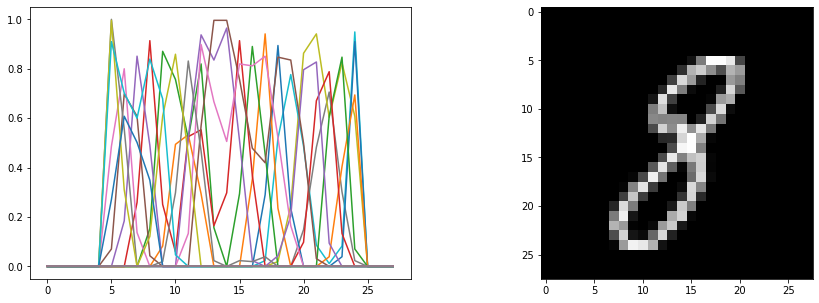

In [2]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# print number of elements in x_test
num = np.random.randint(0,60000)

# showing the image and its feature side by side
plt.subplot(1,2,1)
plt.plot(x_train[num])
plt.subplot(1,2,2)
plt.imshow(x_train[num],cmap="gray")

# setting the image dimensions for clear view
plt.gcf().set_size_inches(15,5)
plt.show()

In [3]:
def encoder(encoder_input):
  layer = tf.keras.layers.Flatten()(encoder_input)
  layer = tf.keras.layers.Dense(64, activation='relu')(layer)
  layer = tf.keras.layers.Dense(32, activation='relu')(layer)
  encoder_output = tf.keras.layers.Dense(16, activation='relu')(layer)
  return encoder_output

def decoder(decoder_input):
  layer = tf.keras.layers.Dense(32, activation='relu')(decoder_input)
  layer = tf.keras.layers.Dense(64, activation='relu')(layer)
  layer = tf.keras.layers.Dense(128, activation='relu')(layer)
  layer = tf.keras.layers.Dense(784, activation='relu')(layer)
  decoder_output = tf.keras.layers.Reshape((28,28,1))(layer)
  return decoder_output

encoder_input = tf.keras.layers.Input(shape=(28,28,1))
encoder_output = encoder(encoder_input)
decoder_output = decoder(encoder_output)

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001, decay = 1e-6)
loss = tf.keras.losses.MeanSquaredError()
metrics = ['accuracy']

2022-12-25 05:07:53.979399: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-25 05:07:54.066069: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-25 05:07:54.067139: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-25 05:07:54.068411: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
def encoder(encoder_input):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(64, activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-5)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(32, activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-5)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(16, activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-5)))
    return model(encoder_input)

def decoder(decoder_input):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dense(784, activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Reshape((28,28,1)))
    return model(decoder_input)


encoder_input = tf.keras.layers.Input(shape=(28,28,1))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001, decay = 1e-6)
loss = tf.keras.losses.MeanSquaredError()
metrics = ['accuracy']

In [5]:
autoencoder = tf.keras.models.Model(encoder_input,decoder(encoder(encoder_input)))
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
sequential (Sequential)      (None, 16)                478448    
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28, 1)         577776    
Total params: 1,056,224
Trainable params: 1,056,224
Non-trainable params: 0
_________________________________________________________________


In [6]:
autoencoder.compile(optimizer=optimizer,loss="mse",metrics=metrics)

In [7]:
# train for which batch size and how many epochs the model gives the best result
results = []
# train for which batch size and how many epochs the model gives the best result
for i in [64,128,512,1024,2048]:
    history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=i, validation_data=(x_test, x_test))
    results.append(history)

2022-12-25 05:07:57.723282: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
938/938 [==============================] - 6s 4ms/step - loss: 0.0596 - accuracy: 0.7978 - val_loss: 0.0474 - val_accuracy: 0.7984
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0469 - accuracy: 0.7976 - val_loss: 0.0416 - val_accuracy: 0.7993
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0440 - accuracy: 0.7982 - val_loss: 0.0397 - val_accuracy: 0.7998
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0425 - accuracy: 0.7987 - val_loss: 0.0391 - val_accuracy: 0.8005
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0416 - accuracy: 0.7991 - val_loss: 0.0385 - val_accuracy: 0.7994
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0410 - accuracy: 0.7994 - val_loss: 0.0379 - val_accuracy: 0.7996
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0404 - accuracy: 0.7996 - val_loss: 0.0378 - val_accuracy: 0.8013
Epoch 

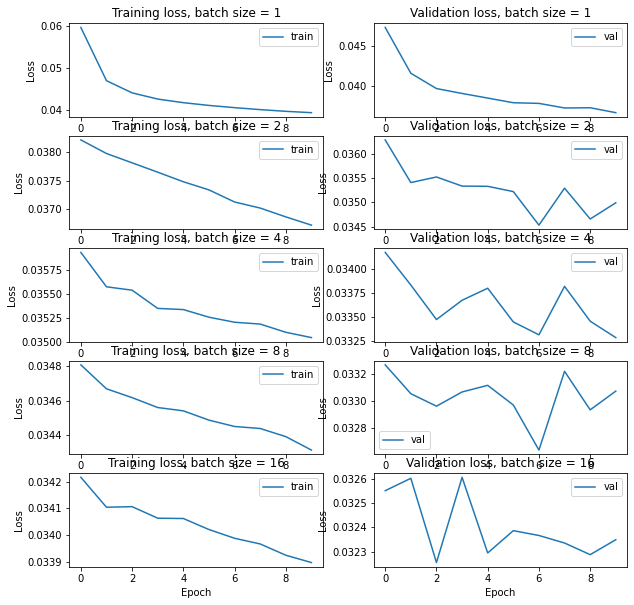

In [8]:
# Set up the figure with subplots
fig, axs = plt.subplots(len(results), 2, figsize=(10, 10))

# Loop through the results and plot the training and validation loss for each model
for i, result in enumerate(results):
    # Get the training and validation loss for this model
    train_loss = result.history['loss']
    val_loss = result.history['val_loss']

    # Plot the training loss on the left subplot
    axs[i, 0].plot(train_loss, label='train')
    axs[i, 0].set_title(f'Training loss, batch size = {2**i}')
    axs[i, 0].set_xlabel('Epoch')
    axs[i, 0].set_ylabel('Loss')
    axs[i, 0].legend()

    # Plot the validation loss on the right subplot
    axs[i, 1].plot(val_loss, label='val')
    axs[i, 1].set_title(f'Validation loss, batch size = {2**i}')
    axs[i, 1].set_xlabel('Epoch')
    axs[i, 1].set_ylabel('Loss')
    axs[i, 1].legend()

# Show the plot
plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.0323 - accuracy: 0.8035


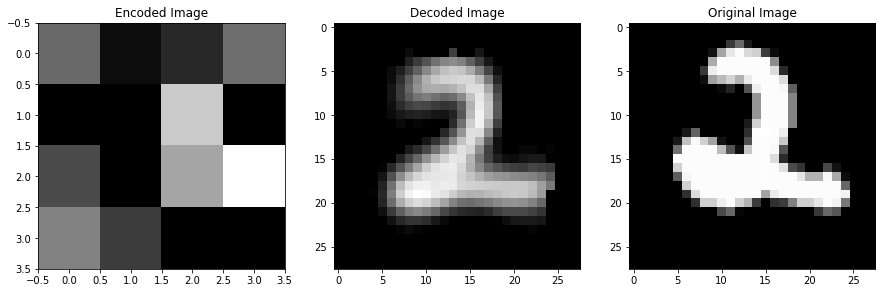

In [9]:
number = np.random.randint(10000)

# testing using test data
autoencoder.evaluate(x_test,x_test)

#predicting some image
encoder = tf.keras.models.Model(encoder_input,encoder(encoder_input))
output_of_encoder = encoder.predict([x_test[number].reshape(-1,28,28,1)])[0]
output_of_encoder.shape

# autoencoder output
output_of_autoencoder = autoencoder.predict([x_test[number].reshape(-1,28,28,1)])[0]
output_of_autoencoder.shape


# side by side comparision of encoded pixels to and the decoder doing its job

plt.subplot(1,3,1)
plt.imshow(output_of_encoder.reshape(4,4,-1), cmap="gray")
plt.title("Encoded Image")

plt.subplot(1,3,2)
plt.imshow(output_of_autoencoder, cmap="gray")
plt.title("Decoded Image")

plt.subplot(1,3,3)
plt.imshow(x_test[number],cmap="gray")
plt.title("Original Image")

plt.gcf().set_size_inches(15,5)
plt.show()

In [10]:
#storage required to store the encoded image
print("Storage required to store the encoded image is {} bytes".format(output_of_encoder.nbytes))
print("Storage required to store the original image is {} bytes".format(x_test[number].nbytes))

Storage required to store the encoded image is 64 bytes
Storage required to store the original image is 3136 bytes
